# PSU DS 300.002: Problem Set 2
## Differential Privacy

### Instructions
This assignment follows the same principles as our hands-on in-class activities, and centers around concepts we've discussed in our differential privacy module.

To ensure that the notebook runs, I've defined a function your_code_here() that simply returns the number 1. Whenever you see a call to this function, you should replace it with code you have written. Please make sure all cells of your notebook run without error before submitting the assignment. If you have not completed all the questions, leave calls to your_code_here() in place or insert dummy values so that the cell does not throw an error when it runs.

When answering non-code questions, feel free to use a comment, or put the cell in Markdown mode and use Markdown.
The point value of each question is listed with the question, and these add up to 100 points. When you have finished your assignment, please submit it via Canvas.

### Preamble

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

# Our usual dataset

adult_data = pd.read_csv("adult_with_pii.csv")
adult_data['DOB'] = pd.to_datetime(adult_data['DOB'], errors='coerce')
adult_data.head()

# Some useful utilities from earlier assignments

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

def your_code_here():
    return 1

## Collaboration Statement

**You are expected to work indepdently on this assignment.** Everyone should write their *own code and responses*. You may collaborate with a classmate through *high level* discussions (only). To the extent that you do so, please describe this in the collaboration statment below.

In [3]:
# In this cell (in markdown or a comment) write your collaboration statement

### Question 1 (1 point)

Write code to answer the following query:

`For each marital status in the census data, how many participants had that status?`

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `unique()` to obtain the set of unique values in a column, and use `shape[0]` to count the number of rows in a dataframe.

In [4]:
adult_data['Martial Status'].unique().shape[0]

7

### Question 2 (3 points)

Write code to return a differentially private version of your result from the last question. Use the definition of `laplace_mech` above.

In [5]:

epsilon = 0.01

[laplace_mech(adult_data['Martial Status'].shape[0], 1, 0.01)]

[32535.856237569675]

### Question 3 (3 points)

In the cell below, answer the following in 3-5 sentences:
- What is the privacy cost of your answer to the last question, and why?
- Does it violate privacy to release the set of unique marital status categories (i.e. the "histogram bin labels"), as we do here? Why or why not? 
- Is the answer to the above point the same for every dataset?

In [6]:
#The privacy cost of the last question was 32595.3163

### Question 4 (5 points)

Fill in the following code block to produce graphs of the percent error introduced for each count. Your code should compute 100 differentially private answers for each marital status, then run `pct_error` on each answer to compute the percent error of that answer. The remaining code will plot histograms of the results for each status.

In [7]:
fig = plt.figure(figsize=(10,6))

dom = adult_data['Martial Status'].unique()
for status,num in zip(dom, range(1, len(dom)+1)):
    orig_vals = [adult_data[status] for x in range(100)]
    errors = [pct_error(x,f(x)) for x in orig_vals]
    ax = fig.add_subplot(4,2,num)
    ax.hist(errors, bins=10)
    ax.set_title(status)

plt.tight_layout()
plt.show()

KeyError: 'Never-married'

<Figure size 720x432 with 0 Axes>

### Question 5 (3 points)

In 3-5 sentences, answer the following:
- Which marital status tends to have the largest error? Which one has the smallest error?
- What is the reason for this discrepency?
- Describe a rule of thumb for deciding when a differentially private counting query will yield an accurate result.

In [ ]:
#Married-AF-Spouse has the largest error. The smallest error is Never-Married. 

### Question 6 (2 points)

Build a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between the `Martial Status` and `Sex` columns of the `adult_data` dataframe.

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `pd.crosstab(..., ...)` (documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)).

In [ ]:
Con_Table = pd.crosstab(adult_data['Martial Status'],
                      adult_data['Sex'],
                      margins = False)
Con_Table

### Question 7 (3 points)

Write code to build a differentially private version of your result from the last question.

*Hint*: use `applymap`.

In [ ]:
Con_Table.applymap(lambda x: len(str(x)))

### Question 8 (5 points)

Write code to display a table containing percent errors for each of the cells in your answer to the last question.

*Hint*: use `applymap` and `pct_error` on your answer to the last question.

In [ ]:
Con_Table = pd.crosstab(adult_data['Martial Status'],
                      adult_data['Sex'],
                      margins = False)
Con_Table.applymap(lambda x: np.abs(x - f(x)/orig * 100.0)

### Question 9 (3 points)

In 3-5 sentences, answer the following:
- What is the privacy cost of your answer to the last question?
- For which cells does your solution produce accurate results? For which cells does it produce results with high error?

In [8]:
# In this cell (in markdown or a comment) write your reponses.

### Question 10 (5 points)

Write code to produce a differentially private contingency table for three variables: `Martial Status`, `Sex`, and `Education`. Also write code to display the percent error for each cell in your table.

*Hint*: see the documentation of `crosstab` for an example of a 3-variable contingency table.

In [9]:
tabs = pd.crosstab(adult_data['Martial Status'], adult_data['Sex'], adult_data['Education'], margins = False)
display(tabs)
errors = your_code_here()
display(errors)

ValueError: values cannot be used without an aggfunc.

### Question 11 (5 points)

In 5-10 sentences, answer the following:
- What is the privacy cost of your differentially private contingency table in the last question? Why?
- The contingency table in the last question contains 3 variables, compared to 2 in the table from earlier. Is the privacy cost for the table in the last question different from the privacy cost in Question 7? Why or why not?
- In general, what is the effect of the number of variables in a single contingency on **privacy cost**? Why is this the case?
- In general, what is the effect of the number of variables in a single contingency on **accuracy**? Why is this the case?

In [10]:
# In this cell (in markdown or a comment) write your reponses.

### Question 12 (2 points)

Define a function `z_clip` that clips elements of its input to lie below `b`. You may assume that no input will be less than 0.

In [11]:
def z_clip(xs, b):
    return np.clip(lower=0, upper=10).sum

### Question 13 (3 points)

Write code to (1) clip the values of the `Capital Gain` column of the dataset, and (2) compute the average of the clipped values. Run your code for various values of the clipping parameter `b`.

In [18]:
cg = adult_data['Capital Gain']

cg.clip(lower=0, upper=10000).sum()

17145231

### Question 14 (5 points)

Write code to return the differentially private average of `Capital Gain` parameterized by the clipping parameter `b`. Run your code for various values of `b` and use `pct_error` to determine the error introduced for each value of `b`. 

*Note*: Your output should look something like the triple ('b', 'answer', 'pct_error').

In [13]:
adult_data['Capital Gain'].sum()adult_data['Capital Gain'].shape[0] 

SyntaxError: invalid syntax (1802710569.py, line 1)

### Question 15 (5 points)

In 5-10 sentences, answer the following:

- In Question 13, at approximately what value of the clipping parameter `b` does the clipped average approach the original (un-clipped) average?
- What is the sensitivity of the clipped average at this value of `b`, and why?
- In Question 14, at approximately what value of the clipping parameter `b` is the error minimized?
- Which seems to be more important for accuracy - the value of `b` or the scale of the noise added? Why?
- Do you think the answer to the previous point will be true for every dataset? Why or why not?

In [14]:
# In this cell (in markdown or a comment) write your reponses.

### Question 16 (10 points)

Write a function `auto_avg` that returns the differentially private average of an array of values `xs`. Your function should **automatically** determine the clipping parameter `b`, and should enforce differential privacy for a **total** privacy cost of `epsilon`.

In [100]:
def auto_avg(xs, epsilon):
    return your_code_here()

### Question 17 (8 points)

In 5-10 sentences, answer the following:
- Summarize (1-2 sentences only) your approach in `auto_avg`.
- Briefly argue that your implementation has privacy cost of `epsilon`.
- How close is your function able to get to the "best" result you got in Question 14? What accounts for the difference?
- Will your approach work well for **all** datasets? If not, describe a dataset for which it is likely to return very inaccurate results.

In [101]:
# In this cell (in markdown or a comment) write your reponses.

### Question 18 (3 points)

Consider the code below, which graphs the total privacy cost of an averaging attack under (1) sequential composition and (2) advanced composition, for values of `k` between 1 and 200.

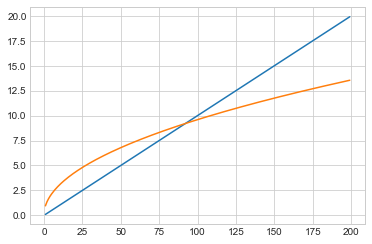

In [102]:
epsilon = .1
delta_p = 1e-5

def query():
    return len(adult_data[adult_data['Martial Status'] == 'Divorced'])

def avg_attack(k):
    return np.mean([laplace_mech(query(), 1, epsilon) for i in range(k)])
    
xs = range(1, 200)
privacy_cost_sequential = [k * epsilon for k in xs]
privacy_cost_advanced = [2 * epsilon * np.sqrt(2 * k * np.log(1/delta_p)) for k in xs]

plt.plot(xs, privacy_cost_sequential);
plt.plot(xs, privacy_cost_advanced);

In 2-5 sentences, answer the following:
- At approximately what point do the lines representing the two approaches cross? What does this mean about **which** composition technique should be used for an iterative algorithm?
- The two lines represent **different** privacy costs for the **same** algorithm. How can both be correct?

In [103]:
# In this cell (in markdown or a comment) write your reponses.

### Question 19 (3 points)

In the cell below, define a function that implements the vector version of the Laplace mechanism. An implementation that works for a single number is defined for reference as `laplace_mech` above.

In [30]:
def laplace_mech_vec(qs, sensitivity, epsilon):
    return [v + np.random.laplace(loc=0, scale=sensitivity/epsilon) for q in qs]

### Question 20 (3 points)

In the cell below, define a function that implements the vector version of the Gaussian mechanism.

In [35]:
def gaussian_mech_vec(qs, sensitivity, epsilon, delta):
    return [v + np.random.normal(loc=0, scale=sensitivity*np.sqrt(2*np.log(1.25/delta))/epsilon) for q in qs]

### Question 21 (4 points)

Consider the code below, which defines three average queries and runs them on `adult_data`.

In [106]:
b_capgain = 3000
b_year = 3000
b_age = 3000

epsilon = 1
n = len(adult_data)

def query1():
    return np.sum(z_clip(adult_data['Capital Gain'], b_capgain))/n

def query2():
    return np.sum(z_clip(adult_data['DOB'].dt.year, b_year))/n

def query3():
    return np.sum(z_clip(adult_data['Age'], b_age))/n

def my_query():
    return [query1(), query2(), query3()]

my_query()

[3.071158748195694e-05, 3.071158748195694e-05, 3.071158748195694e-05]

In 2-5 sentences, answer the following:
- What is the $L_1$ sensitivity of `my_query`, and why?
- What is the $L_2$ sensitivity of `my_query`, and why?

In [107]:
# In this cell (in markdown or a comment) write your reponses.

### Question 22 (6 points)

In the cell below, write code to release the results of calling `my_query()` with differential privacy, without using sequential composition.

*Hint*: use `laplace_mech_vec`, but be careful of sensitivity!

In [108]:
your_code_here()

1

### Question 23 (4 points)

In 2-5 sentences, answer the following:
- What is the total privacy cost of your answer to Question 22, and why?

### Question 24 (6 points)

In the cell below, write code to release the results of `my_query()` with differential privacy, but using the Gaussian mechanism.

In [7]:
your_code_here()

1